In [1]:
import pandas as pd
import numpy as np
import os
import sys

initialDataFrame = pd.read_csv('./data/Atlanta Collisions Dataset.csv')
# print(initialDataFrame)

print(initialDataFrame[77:82])

    Collision ID  Posted Speed (Crash Level)   Speed Limit  \
77       4694409                         55.0         55.0   
78       4694602                         25.0          NaN   
79       4694894                         55.0         55.0   
80       4694914                         55.0         55.0   
81       4695052                         35.0          NaN   

          Speed Related  Distracted Driver (Suspected)  \
77  [false,false,false]                          False   
78        [false,false]                          False   
79        [false,false]                           True   
80        [false,false]                          False   
81  [false,false,false]                          False   

   Distracted Driver Related (Confirmed) Suspected At Fault  \
77                   [false,false,false]                NaN   
78                         [false,false]                Yes   
79                         [false,false]                Yes   
80                        

In [2]:
columns_to_check = [
    "Collision ID", "Posted Speed (Crash Level) ", "Speed Limit", "Speed Related",
    "Distracted Driver (Suspected)", "Distracted Driver Related (Confirmed)", "Suspected At Fault",
    "Aggressive Driving Related", "Red Light Running T/F", "Severity Score", "Suspected At Fault",
    "# of Fatalities per Crash", "Date & Time", "Driver Condition (Crash Level) ",
    "Driver Age (Crash Level) ", "Hit & Run Related", "Impaired Driving (Confirmed)", "Lat",
    "Long", "Person ID", "Roadway Contributing Factors", "Surface Condition (Crash Level) ",
    "Weather Conditions (Crash Level)", "Light Conditions (Crash Level)", "Traffic Control",
    "# of Injuries per crash ", "KABCO Severity", "Vehicle Contributing Factor (Crash Level)"
]

df_cleaned = initialDataFrame.dropna(subset=columns_to_check)

df_cleaned.to_csv('cleaned_file.csv', index=True)
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned = df_cleaned.drop(columns=['Impaired Driving (Confirmed)'])
df_cleaned = df_cleaned.drop(columns=['Red Light Running T/F'])
print(df_cleaned.head())

   Collision ID  Posted Speed (Crash Level)   Speed Limit  Speed Related  \
0       4692915                         35.0         30.0  [false,false]   
1       4693187                         35.0         25.0  [false,false]   
2       4693212                         55.0         55.0  [false,false]   
3       4693230                         55.0         55.0          false   
4       4693231                          0.0         30.0  [false,false]   

   Distracted Driver (Suspected) Distracted Driver Related (Confirmed)  \
0                           True                         [false,false]   
1                           True                         [false,false]   
2                           True                         [false,false]   
3                           True                                 false   
4                          False                         [false,false]   

  Suspected At Fault Aggressive Driving Related  Severity Score  \
0      ["Yes","Yes"]           

In [3]:
exclude_column = "Collision ID"

# Create a dictionary to store unique values for each column
unique_values_dict = {}

# Loop through columns and store unique values
for column in df_cleaned.columns:
    if column != exclude_column:  # Exclude "Collision ID"
        unique_values_dict[column] = df_cleaned[column].dropna().unique()  # Remove NaN values and get unique ones

# Now, unique_values_dict contains all unique values for each column
print(unique_values_dict)  # You can print, analyze, or save it as needed


{'Posted Speed (Crash Level) ': array([ 35.,  55.,   0.,  45.,  40.,  30.,  25.,  10.,  15.,  50.,  65.,
        54.,  60.,  20.,  36.,   5.,  77.,  70.,   1.,  -1.,  43.,  24.,
        66., 555.,  75.,  11.,  48.,  46.,   3.,   2., 151., 235.,  12.,
       115.,  39., 558.,  72.,  44., 355., 560., 400.,   6.,  53., 100.,
       550.,  23.,  34.,  26.,  32.,  49.,  95.,  69., 551., 504.,  22.,
        21., 556.,  64., 557.,  67., 565.,  29.,  85.,  52., 554.,   4.,
        56.,   7., 690., 606., 285., 335., 451., 545., 325., 660., 655.]), 'Speed Limit': array([30., 25., 55., 35., 40., 50., 45., 60., 15., 20.]), 'Speed Related': array(['[false,false]', 'false', '[false,false,false]', 'true',
       '[false,true]', '[false,false,true]', '[false,false,false,false]',
       '[false,false,true,true]', '[false,false,false,true]',
       '[false,false,false,false,false,false]',
       '[false,false,false,false,false]',
       '[false,false,false,false,true]',
       '[false,false,false,false,

In [4]:
import ast  # Helps convert string representations of lists into actual lists

# Load your dataset (replace 'your_file.csv' with your actual file)

# Define the columns that store arrays and single values
array_columns = [
    "Speed Related", "Distracted Driver Related (Confirmed)", "Suspected At Fault",
    "Aggressive Driving Related", "Driver Condition (Crash Level) ", "Driver Age (Crash Level) ",
    "Person ID", "Roadway Contributing Factors", "Traffic Control",
    "Vehicle Contributing Factor (Crash Level)"
]

# Function to check if a value is an array and its length exceeds 2
def filter_rows(row):
    for column in array_columns:
        value = row[column]

        # Convert string representations of lists into actual lists (if necessary)
        if isinstance(value, str) and value.startswith("[") and value.endswith("]"):
            try:
                value = ast.literal_eval(value)  # Safely convert string to list
            except (SyntaxError, ValueError):
                pass  # If conversion fails, treat it as a normal string

        # If it's a list and contains more than 2 elements, drop the row
        if isinstance(value, list) and len(value) > 2:
            return False  # Exclude this row

    return True  # Keep the row

# Apply filtering
newdf = df_cleaned[df_cleaned.apply(filter_rows, axis=1)]
newdf = newdf.reset_index(drop=True)
# Display the filtered DataFrame
print(newdf)

        Collision ID  Posted Speed (Crash Level)   Speed Limit  Speed Related  \
0            4692915                         35.0         30.0  [false,false]   
1            4693230                         55.0         55.0          false   
2            4693260                         35.0         35.0          false   
3            4693278                         35.0         25.0  [false,false]   
4            4693367                         35.0         35.0  [false,false]   
...              ...                          ...          ...            ...   
222332       9356270                         55.0         55.0  [false,false]   
222333       9366324                         35.0         35.0  [false,false]   
222334       9367596                         55.0         55.0  [false,false]   
222335       9378482                          0.0         35.0  [false,false]   
222336       9384730                         35.0         35.0  [false,false]   

        Distracted Driver (

In [5]:
speeding_count = 0

# Loop through each row to compare Posted Speed and Speed Limit
for _, row in newdf.iterrows():
    posted_speed = row["Posted Speed (Crash Level) "]
    speed_limit = row["Speed Limit"]

    # Ensure both values are numeric (in case of unexpected formats)
    if isinstance(posted_speed, (int, float)) and isinstance(speed_limit, (int, float)):
        if posted_speed > speed_limit and speed_limit != 0:
            speeding_count += 1  # Increase the count if conditions are met

# Display the final count
print(f"Total speeding instances: {speeding_count}")


Total speeding instances: 64224


In [6]:
wet_count = 0
dry_count = 0
iceFrost_count = 0
sand_count = 0
snow_count = 0
slush_count = 0
water_count = 0
oil_count = 0
mud_count = 0
other_count = 0
none_count = 0
# Loop through each row to check for wet conditions
for _, row in newdf.iterrows():
    surface_condition = row["Surface Condition (Crash Level) "]

    # Check if either condition indicates wetness
    if ("wet" in str(surface_condition).lower()):
        wet_count += 1  # Increase the count if conditions are met
    elif ("dry" in str(surface_condition).lower()):
        dry_count += 1
    elif ("ice/frost" in str(surface_condition).lower()):
        iceFrost_count += 1
    elif ("sand" in str(surface_condition).lower()):
        sand_count += 1
    elif ("snow" in str(surface_condition).lower()):
        snow_count += 1
    elif ("slush" in str(surface_condition).lower()):
        slush_count += 1
    elif ("water" in str(surface_condition).lower()):
        water_count += 1
    elif ("oil" in str(surface_condition).lower()):
        oil_count += 1
    elif ("mud" in str(surface_condition).lower()):
        mud_count += 1
    elif ("other" in str(surface_condition).lower()):
        other_count += 1
    elif ("none" in str(surface_condition).lower()):
        none_count += 1
    
print(f"Total wet conditions: {wet_count}")
print(f"Total dry conditions: {dry_count}")
print(f"Total ice/frost conditions: {iceFrost_count}")
print(f"Total sand conditions: {sand_count}")
print(f"Total snow conditions: {snow_count}")
print(f"Total slush conditions: {slush_count}")
print(f"Total water conditions: {water_count}")
print(f"Total oil conditions: {oil_count}")
print(f"Total mud conditions: {mud_count}")
print(f"Total other conditions: {other_count}")
print(f"Total none conditions: {none_count}")

Total wet conditions: 33785
Total dry conditions: 183945
Total ice/frost conditions: 285
Total sand conditions: 19
Total snow conditions: 112
Total slush conditions: 29
Total water conditions: 2673
Total oil conditions: 19
Total mud conditions: 14
Total other conditions: 290
Total none conditions: 1166


In [7]:
def label_risk(score):
    if score >= 8.0:
        return 2  # High
    elif score >= 4.0:
        return 1  # Medium
    else:
        return 0  # Low

newdf['Risk Label'] = newdf['Severity Score'].apply(label_risk)

# Optional: Create a 0–100 'base risk' from raw severity
# (purely for reference; we'll predict a new risk score later)
min_sev, max_sev = newdf['Severity Score'].min(), newdf['Severity Score'].max()
newdf['Base Risk (0–100)'] = ((newdf['Severity Score'] - min_sev) / (max_sev - min_sev) * 100).round(1)

# Confirm distribution
print(newdf['Risk Label'].value_counts())
newdf[['Severity Score','Risk Label','Base Risk (0–100)']].head(10)

Risk Label
0    211931
1     10064
2       342
Name: count, dtype: int64


,Severity Score,Risk Label,Base Risk (0–100)
0,1.0,0,0.0
1,1.0,0,0.0
2,1.0,0,0.0
3,1.0,0,0.0
4,1.5,0,5.6
5,1.5,0,5.6
6,1.5,0,5.6
7,1.0,0,0.0
8,1.0,0,0.0
9,1.0,0,0.0


In [24]:
from pathlib import Path
def contains_any(text: str, keywords: list[str]) -> bool:
    if pd.isna(text):
        return False
    txt = str(text).upper()
    return any(kw.upper() in txt for kw in keywords)



In [25]:
def calculate_risk_score(f: dict) -> float:
    s = 0
    # ---------- driving behaviour ----------
    s += (f["speed_over_limit"] / 10) * 10
    if f["aggressive_driving"]:  s += 20
    if f["distracted_driving"]:  s += 15

    # ---------- environment ----------
    s += {"clear":0,"light_rain":5,"heavy_rain":10,"snow":10,"fog":15}.get(f["weather_condition"], 0)
    s += {"dry":0,"wet":5,"snow_ice":10,"oil":10}.get(f["road_surface"], 0)
    s += {"daylight":0,"dark_lit":5,"dark_unlit":10}.get(f["lighting"], 0)
    s += {"day":0,"night":5,"night_late":10}.get(f["time_of_day"], 0)

    # ---------- driver age ----------
    age = f["driver_age"]
    if   age <= 19:        s += 15
    elif 20 <= age <= 24:  s += 8
    elif age >= 75:        s += 10

    # ---------- vehicle / legal ----------
    if f["vehicle_defect"]: s += 10
    if f["hit_and_run"]:    s += 15
    if f["at_fault"]:       s += 10
    s += {"none":5,"obeyed_signal":0,"stop_violation":15,
          "signal_violation":20}.get(f["traffic_control"], 0)
    return min(s, 100)


In [26]:
# EDIT THESE
CRASH_CSV_PATH   = Path("./data/newdf.csv")
UNIQUE_VALUES_PATH = Path("./data/unique_values_dict.csv")

df   = pd.read_csv(CRASH_CSV_PATH,   parse_dates=['Date & Time'], low_memory=False)
uniq = pd.read_csv(UNIQUE_VALUES_PATH)

print("Crash rows:", len(df), "  Distinct‑value helper rows:", len(uniq))


C:\Users\lopez\AppData\Local\Temp\ipykernel_18392\912081312.py:6: DtypeWarning: Columns (2,3,4,5,6,8,11,12,13,16,17,18,19,20,21,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  uniq = pd.read_csv(UNIQUE_VALUES_PATH)


Crash rows: 222337   Distinct‑value helper rows: 296921


In [27]:
for c in df.columns:
    if df[c].dtype == object:
        df[c].fillna("Unknown", inplace=True)
    else:
        df[c].fillna(df[c].median(), inplace=True)

binary_like = [
    c for c in df.columns
    if df[c].dtype == object and
       set(df[c].str.upper().unique()) & {'Y','N','YES','NO','T','F','TRUE','FALSE','1','0'}
]
for col in binary_like:
    df[col] = (
        df[col].str.upper()
          .map({'Y':1,'YES':1,'T':1,'TRUE':1,'1':1,
                'N':0,'NO':0,'F':0,'FALSE':0,'0':0})
         .fillna(0).astype(int)
    )

print("Cleaned dataframe shape:", df.shape)


C:\Users\lopez\AppData\Local\Temp\ipykernel_18392\2487369269.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].median(), inplace=True)
C:\Users\lopez\AppData\Local\Temp\ipykernel_18392\2487369269.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

Cleaned dataframe shape: (222337, 28)


In [23]:
print(df.columns.tolist())          # see every column name

['Collision ID', 'Posted Speed (Crash Level) ', 'Speed Limit', 'Speed Related', 'Distracted Driver (Suspected)', 'Distracted Driver Related (Confirmed)', 'Suspected At Fault', 'Aggressive Driving Related', 'Severity Score', 'Suspected At Fault.1', '# of Fatalities per Crash', 'Date & Time', 'Driver Condition (Crash Level) ', 'Driver Age (Crash Level) ', 'Hit & Run Related', 'Lat', 'Long', 'Person ID', 'Roadway Contributing Factors', 'Surface Condition (Crash Level) ', 'Weather Conditions (Crash Level)', 'Light Conditions (Crash Level)', 'Traffic Control', '# of Injuries per crash ', 'KABCO Severity', 'Vehicle Contributing Factor (Crash Level)', 'Risk Label', 'Base Risk (0–100)']


In [32]:
def safe_get(cands, row, default=np.nan):
    for c in cands:
        if c in row and not pd.isna(row[c]):
            return row[c]
    return default

def row_to_rule_features(r):
    # -------- speed over limit --------
    posted_speed = safe_get(
        ["Posted Speed (Crash Level) ",
         "Posted Speed Crash Level ",
         "Posted_Speed_Crash_Level "], r, default=np.nan)
    speed_limit  = safe_get(
        ["Speed Limit","Speed_Limit"], r, default=np.nan)
    try:
        over_limit = max(float(posted_speed) - float(speed_limit), 0)
    except:
        over_limit = 0

    aggressive = bool(r.get("Aggressive Driving Related", 0))
    distracted = bool(r.get("Distracted Driver Related (Confirmed)", 0))

    # ---------- environment ----------
    w_raw = str(r.get("Weather Conditions (Crash Level)", ""))
    if   contains_any(w_raw, ["FOG","MIST"]):      weather="fog"
    elif contains_any(w_raw, ["SNOW","ICE"]):      weather="snow"
    elif contains_any(w_raw, ["HVY","HEAVY"]):     weather="heavy_rain"
    elif contains_any(w_raw, ["RAIN"]):            weather="light_rain"
    else:                                          weather="clear"

    s_raw = str(r.get("Surface Condition (Crash Level)", ""))
    if   contains_any(s_raw, ["SNOW","ICE"]):      road="snow_ice"
    elif contains_any(s_raw, ["WET","SLUSH"]):     road="wet"
    elif contains_any(s_raw, ["OIL","SLICK"]):     road="oil"
    else:                                          road="dry"

    l_raw = str(r.get("Light Conditions (Crash Level)", ""))
    if   contains_any(l_raw, ["DARK"]) and contains_any(l_raw, ["UNLIT","NO"]):
        lighting="dark_unlit"
    elif contains_any(l_raw, ["DARK"]):
        lighting="dark_lit"
    else:
        lighting="daylight"

    hr  = r["Date & Time"].hour if "Date & Time" in r else 12
    time_of_day = "night_late" if 0<=hr<5 else "night" if hr>=20 else "day"

    age = int(r.get("Driver Age (Crash Level)", 40))

    veh_def = not str(r.get("Vehicle Contributing Factor (Crash Level)", "None")).upper() in ("NONE","UNKNOWN")
    hitrun  = bool(r.get("Hit & Run Related", 0))
    atfault = bool(r.get("Suspected At Fault", 0))

    tc_raw = str(r.get("Traffic Control", ""))
    if   contains_any(tc_raw, ["SIGNAL"]) and contains_any(tc_raw, ["VIOL"]):
        tctrl="signal_violation"
    elif contains_any(tc_raw, ["STOP"]) and contains_any(tc_raw, ["VIOL"]):
        tctrl="stop_violation"
    elif contains_any(tc_raw, ["SIGNAL","STOP","LIGHT"]):
        tctrl="obeyed_signal"
    else:
        tctrl="none"

    return {
        "speed_over_limit":over_limit,
        "aggressive_driving":aggressive,
        "distracted_driving":distracted,
        "weather_condition":weather,
        "road_surface":road,
        "lighting":lighting,
        "time_of_day":time_of_day,
        "driver_age":age,
        "vehicle_defect":veh_def,
        "hit_and_run":hitrun,
        "at_fault":atfault,
        "traffic_control":tctrl,
    }


In [33]:
df["Rule_Risk_Score"] = df.apply(lambda r: calculate_risk_score(row_to_rule_features(r)), axis=1)
print(df["Rule_Risk_Score"].describe())
df[["Rule_Risk_Score"]].head()


count    222337.000000
mean         24.451247
std          11.646275
min          10.000000
25%          15.000000
50%          20.000000
75%          30.000000
max         100.000000
Name: Rule_Risk_Score, dtype: float64


,Rule_Risk_Score
0,30.0
1,40.0
2,20.0
3,40.0
4,10.0


In [35]:
unique_values_dict = {}

# Loop through columns and store unique values
for column in df.columns:
    if column != exclude_column:  # Exclude "Collision ID"
        unique_values_dict[column] = df[column].dropna().unique()  # Remove NaN values and get unique ones

# Now, unique_values_dict contains all unique values for each column
print(unique_values_dict)  # You can print, analyze, or save it as needed

{'Posted Speed (Crash Level) ': array([ 35.,  55.,   0.,  45.,  40.,  30.,  25.,  10.,  15.,  50.,  65.,
        54.,  60.,  20.,  36.,   5.,  77.,  70.,   1.,  -1.,  43.,  24.,
       555.,  75.,  11.,  46.,   3.,   2., 151.,  66., 235.,  12.,  48.,
        44., 355., 400.,   6.,  53.,  23.,  34.,  26.,  32.,  95., 551.,
        39., 504.,  22.,  21.,  64., 557.,  67.,  29.,  69.,  85., 554.,
         4.,  56.,   7., 556., 690., 606., 285., 335.,  52., 451., 545.,
       660.]), 'Speed Limit': array([30., 55., 35., 25., 40., 50., 45., 60., 15., 20.]), 'Speed Related': array([0, 1]), 'Distracted Driver (Suspected)': array([ True, False]), 'Distracted Driver Related (Confirmed)': array([0, 1]), 'Suspected At Fault': array([0, 1]), 'Aggressive Driving Related': array([0, 1]), 'Severity Score': array([ 1. ,  1.5,  5. ,  7.5, 10. ]), 'Suspected At Fault.1': array([0, 1]), '# of Fatalities per Crash': array([0., 1., 2.]), 'Date & Time': <DatetimeArray>
['2014-01-01 10:15:00', '2014-01-01 00

In [41]:
# ------------------------------------------------------------------
#  ❱❱  FIX DUPLICATE / BLANK COLUMN NAMES  ❰❰
# ------------------------------------------------------------------
# 1) strip whitespace from every column   →  "Posted Speed (Crash Level)"
df.columns = df.columns.str.strip()

# 2) be sure we do not keep any exact duplicate titles
df = df.loc[:, ~df.columns.duplicated(keep="first")]

# 3) if Crash_Hour already exists, don't append it again later
if "Crash_Hour" in df.columns:
    df.drop(columns=["Crash_Hour"], inplace=True)
# ------------------------------------------------------------------

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import sklearn
from packaging import version           # comes with scikit‑learn wheels

# --------------------------
# 8.1  Select feature columns
# --------------------------
exclude = {
    "Rule_Risk_Score", "Collision ID", "Person ID",
    "Lat", "Long", "Location", "Date & Time"
}
feature_cols = [c for c in df.columns if c not in exclude]

# derive hour‑of‑day numeric feature
df["Crash_Hour"] = df["Date & Time"].dt.hour
feature_cols.append("Crash_Hour")

numeric_cols     = [c for c in feature_cols if df[c].dtype != object]
categorical_cols = [c for c in feature_cols if df[c].dtype == object]
print("Numeric:", len(numeric_cols), "| Categorical:", len(categorical_cols))

# --------------------------
# 8.2  Version‑safe encoder
# --------------------------
if version.parse(sklearn.__version__) >= version.parse("1.2"):
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=True)
else:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=True)

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(),              numeric_cols),
        ("cat", ohe,                           categorical_cols),
    ],
    remainder="drop",
    n_jobs=-1
)


Numeric: 16 | Categorical: 8


In [42]:
from sklearn.model_selection import train_test_split

X = df[feature_cols]
y = df["Rule_Risk_Score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------------
# models to compare
# --------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest":     RandomForestRegressor(
                            n_estimators=250,
                            max_depth=20,
                            n_jobs=-1,
                            random_state=42
                         ),
    "Gradient Boosting": GradientBoostingRegressor(
                            n_estimators=300,
                            learning_rate=0.05,
                            max_depth=3,
                            random_state=42
                         ),
}


In [43]:
from sklearn.metrics import mean_absolute_error, r2_score

results = {}

for name, model in models.items():
    pipe = Pipeline(
        steps=[("prep", preprocess), ("model", model)],
        verbose=False
    )
    pipe.fit(X_train, y_train)

    preds = pipe.predict(X_test)
    mae  = mean_absolute_error(y_test, preds)
    r2   = r2_score(y_test, preds)

    results[name] = {"MAE": mae, "R2": r2}
    print(f"{name:<18}  MAE: {mae:6.2f}   R²: {r2:6.3f}")


Linear Regression   MAE:   3.24   R²:  0.858
Random Forest       MAE:   0.20   R²:  0.993
Gradient Boosting   MAE:   0.80   R²:  0.989


In [44]:
# pick whichever scored best above
best_name = max(results, key=lambda k: results[k]["R2"])
print("Best:", best_name, results[best_name])

best_pipe = Pipeline(steps=[("prep", preprocess), ("model", models[best_name])])
best_pipe.fit(X_train, y_train)

# For tree models we can show the top drivers
if hasattr(models[best_name], "feature_importances_"):
    # Get one‑hot feature names
    ohe_cols = best_pipe.named_steps["prep"] \
                        .named_transformers_["cat"] \
                        .get_feature_names_out(categorical_cols)
    all_feature_names = numeric_cols + list(ohe_cols)

    importances = models[best_name].feature_importances_
    imp_df = (pd.DataFrame({"feature": all_feature_names,
                            "importance": importances})
                .sort_values("importance", ascending=False)
                .head(20))
    display(imp_df.reset_index(drop=True))
else:
    print("Chosen model is linear; use .coef_ for weights")


Best: Random Forest {'MAE': 0.19607768545110463, 'R2': 0.9928580634712653}


,feature,importance
0,Hit & Run Related,0.374865
1,Light Conditions (Crash Level)_Daylight,0.160237
2,Suspected At Fault,0.141763
3,Posted Speed (Crash Level),0.121612
4,Speed Limit,0.065131
5,Crash_Hour,0.039811
6,Aggressive Driving Related,0.026648
7,"Traffic Control_[""Traffic Signal"",""Traffic Sig...",0.019917
8,Weather Conditions (Crash Level)_Rain,0.017960
9,Light Conditions (Crash Level)_Dark-Not Lighted,0.008416


In [46]:
import joblib
joblib.dump(best_pipe, "risk_score_regressor.joblib")


['risk_score_regressor.joblib']

In [ ]:
new_scores = best_pipe.predict(df[feature_cols])


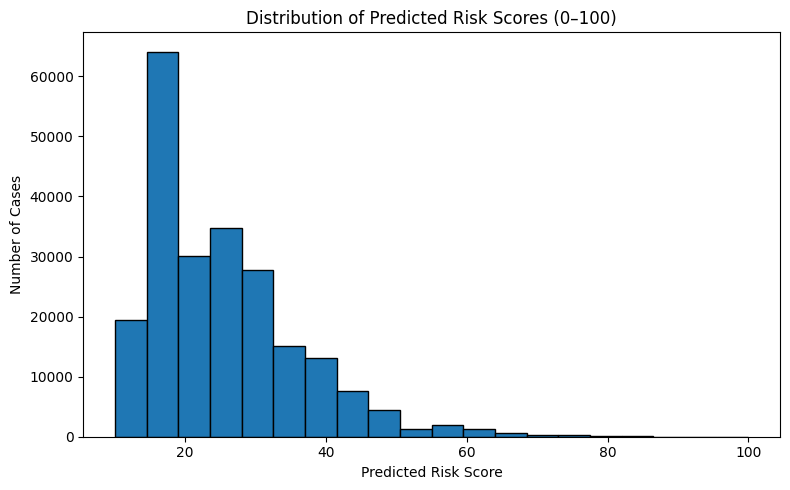

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- demo scaffold: replace these two lines with your own data ---
# (If you already have `new_scores`, comment out the synthetic line below.)
try:
    new_scores
except NameError:
    new_scores = np.random.randint(0, 101, size=500)  # <- placeholder demo data

# ---------------------------------------------------------------

plt.figure(figsize=(8, 5))
plt.hist(new_scores, bins=20, edgecolor='black')
plt.title("Distribution of Predicted Risk Scores (0–100)")
plt.xlabel("Predicted Risk Score")
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.show()
